In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
df = pd.read_csv("https://raw.githubusercontent.com/charleyferrari/CUNY_DATA608/master/lecture4/Data/riverkeeper_data_2013.csv")

In [199]:
df.head()

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,10/16/2011,1733,1.5,35
1,Hudson above Mohawk River,10/21/2013,4,0.2,35
2,Hudson above Mohawk River,9/21/2013,20,0.0,35
3,Hudson above Mohawk River,8/19/2013,6,0.0,35
4,Hudson above Mohawk River,7/21/2013,31,0.0,35


In [200]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 5 columns):
Site                3397 non-null object
Date                3397 non-null object
EnteroCount         3397 non-null object
FourDayRainTotal    3397 non-null float64
SampleCount         3397 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 92.9+ KB


In [201]:
#Cleaning up data
df['EnteroCount'] = df['EnteroCount'].str.replace('>', '')
df['EnteroCount'] = df['EnteroCount'].str.replace('<', '')
df['EnteroCount'] = df['EnteroCount'].astype(int)

In [202]:
#Checking results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 5 columns):
Site                3397 non-null object
Date                3397 non-null object
EnteroCount         3397 non-null int32
FourDayRainTotal    3397 non-null float64
SampleCount         3397 non-null int64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 92.9+ KB


In [203]:
#Group by Site
df_grouped = df.groupby(['Site'])['EnteroCount'].mean()

In [204]:
len(df_grouped)

75

In [205]:
df_grouped = df_grouped.reset_index()

In [206]:
#Sort
df_sorted = df_grouped.sort(['EnteroCount'])

c:\python27\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [207]:
df_sorted = df_sorted.reset_index()

In [208]:
#Top 5
df_sorted[:5]

,index,Site,EnteroCount
0,59,Poughkeepsie Drinking Water Intake,8.342105
1,17,Croton Point Beach,15.458333
2,64,Stony Point mid-channel,17.340909
3,42,Little Stony Point,17.526316
4,60,Poughkeepsie Launch Ramp,17.675676


In [209]:
#Bottom 5
df_sorted[-5:]

,index,Site,EnteroCount
70,70,Upper Sparkill Creek,1296.072727
71,63,Saw Mill River,1455.760000
72,66,Tarrytown Marina,2205.666667
73,48,Newtown Creek- Metropolitan Ave. Bridge,2953.684211
74,29,Gowanus Canal,4206.837838


In [210]:
safe = df_sorted[:10]
not_safe = df_sorted[-10:]

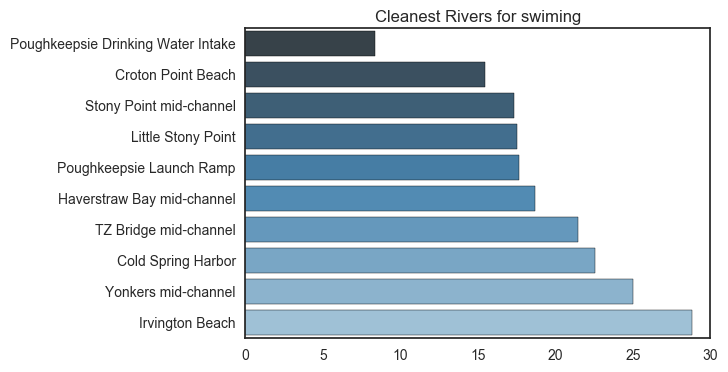

In [211]:
%matplotlib inline
sns.set(style="white")
g = sns.barplot(x='EnteroCount', y='Site',palette="Blues_d", data=safe)
plt.title('Cleanest Rivers for swiming')
plt.xlabel("")
plt.ylabel("")

In [212]:
not_safe = not_safe.sort(['EnteroCount'], ascending=False)

c:\python27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


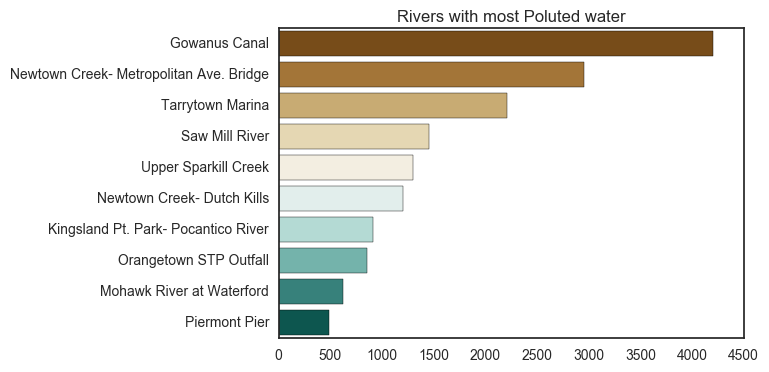

In [213]:
%matplotlib inline
sns.set(style="white")
g = sns.barplot(x='EnteroCount', y='Site',palette="BrBG", data=not_safe)
plt.title('Rivers with most Poluted water')
plt.xlabel("")
plt.ylabel("")

The testing of water quality can be sporadic. Which sites have been tested most regularly?
Which ones have long gaps between tests? Pick out 5-10 sites and visually compare how
regularly their water quality is tested

In [214]:
#Most frequent tests
df['Site'].value_counts()[:10]

Piermont Pier                              187
Upper Sparkill Creek                       165
125th St. Pier                              66
Nyack Launch Ramp                           61
TZ Bridge mid-channel                       57
Newtown Creek- Dutch Kills                  57
Orangetown STP Outfall                      57
Newtown Creek- Metropolitan Ave. Bridge     57
Yonkers mid-channel                         52
Yonkers STP Outfall                         51
Name: Site, dtype: int64

In [215]:
#Least frequent tests
df['Site'].value_counts()[-10:]

Coxsackie Waterfront Park    35
Wappingers Creek             35
Mohawk River at Waterford    35
Hudson above Mohawk River    35
Marlboro Landing             35
Athens                       35
Cold Spring Harbor           35
Castleton                    35
Island Creek/Normans Kill    35
Tarrytown Marina             27
Name: Site, dtype: int64

In [216]:
tests = df['Site'].value_counts()

In [217]:
#Randomly select 10 rivers
import numpy as np
rows=np.random.choice(tests.index.values, 10)
random_df = tests.ix[rows]

In [218]:
random_df

Upper Sparkill Creek                  165
Congress St. Bridge- Troy              38
Kingston Point Beach                   43
Castle Point, NJ                       39
Island Creek/Normans Kill              35
Poughkeepsie Launch Ramp               37
Dunn Memorial Bridge- Albany           38
Yonkers STP Outfall                    51
Fort Montgomery                        36
East River mid-channel at 23rd St.     50
Name: Site, dtype: int64

In [219]:
random_sorted = random_df.sort(['EnteroCount'])

c:\python27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [220]:
df1 = df[df['Site'].isin(rows)]

In [221]:
df1.index=df1['Date']

In [222]:
df1['Date']=pd.to_datetime(df1['Date'])

c:\python27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [223]:
df1.head()

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
Date,,,,,
7/21/2013,Congress St. Bridge- Troy,2013-07-21,40,0.0,38
5/22/2008,Congress St. Bridge- Troy,2008-05-22,24,0.2,38
6/19/2008,Congress St. Bridge- Troy,2008-06-19,56,1.4,38
10/23/2009,Congress St. Bridge- Troy,2009-10-23,30,0.0,38
6/4/2013,Congress St. Bridge- Troy,2013-06-04,1300,1.2,38


In [224]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 7/21/2013 to 10/19/2009
Data columns (total 5 columns):
Site                532 non-null object
Date                532 non-null datetime64[ns]
EnteroCount         532 non-null int32
FourDayRainTotal    532 non-null float64
SampleCount         532 non-null int64
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 18.7+ KB


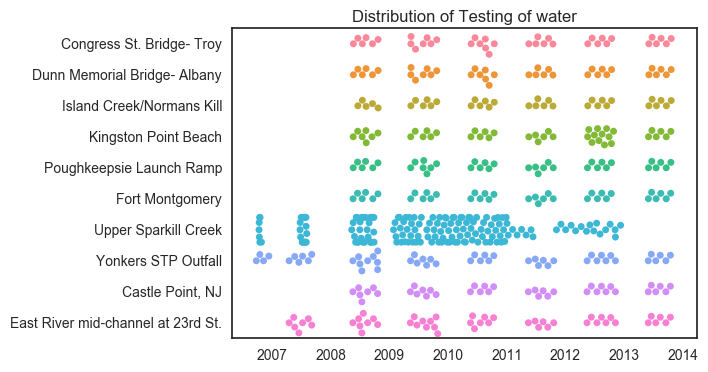

In [225]:
%matplotlib inline
p = sns.swarmplot(x='Date', y="Site", hue='Site', data=df1)
plt.title('Distribution of Testing of water')
plt.xlabel("")
plt.ylabel("")
#p.set(xlim=(0,50))
p.legend_.remove()
plt.show()

Is there a relationship between the amount of rain and water quality? Show this
relationship graphically. If you can, estimate the effect of rain on quality at different sites and
create a visualization to compare them.

[(0, 6)]

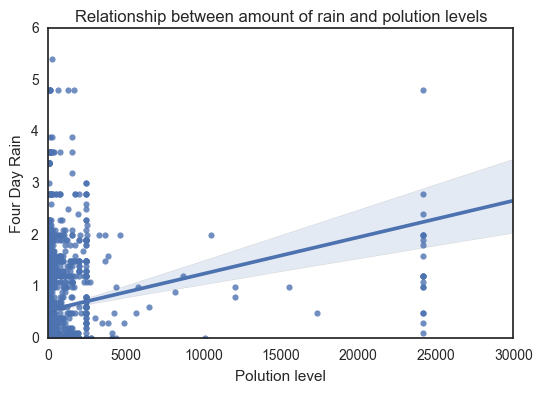

In [226]:
p1 = sns.regplot(x="EnteroCount", y="FourDayRainTotal", data=df)
plt.title('Relationship between amount of rain and polution levels')
plt.xlabel("Polution level")
plt.ylabel("Four Day Rain")
p1.set(xlim=(0,30000))
p1.set(ylim=(0,6))

In [228]:
#Check corelation
import numpy
numpy.corrcoef(df.FourDayRainTotal, df.EnteroCount)[0, 1]

0.14482598724767229

Correlation is weak, but we can see that the more rain we get the higher is the polution level.